## <span style="color:green"> 1. Import data </span>

### 1.1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import datetime
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from datetime import date

### 1.2. Importing Data

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv('HR_DS.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [4]:
data.EmployeeNumber.nunique()

1470

In [5]:
data.set_index('EmployeeNumber', inplace = True)

In [6]:
duplicate = data[data.duplicated(keep = False)]
duplicate

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [7]:
data.shape

(1470, 34)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

In [9]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [10]:
data.describe(include = ['O'])

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


#### Data Types:

- **Categorical Ordinal**: Education, EmployeeCount, EnvironmentSatisfaction, JobInvolvement, JobLevel, JobSatisfaction, PerformanceRating, RelationshipSatisfaction, StockOptionLevel, WorkLifeBalance, BusinessTravel, Department, EducationField , JobRole, MaritalStatus, DistanceFromHome
- **Categorical Binary**: Attrition, Gender, Over18, OverTime
- **Numerical Discrete (Integer)**: Age, DailyRate, DistanceFromHome, HourlyRate, MonthlyIncome, MonthlyRate, NumCompaniesWorked, PercentSalaryHike, StandardHours, TotalWorkingYears, TrainingTimesLastYear, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager

In [11]:
data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [12]:
data['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [13]:
data['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [14]:
data['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [15]:
data['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [16]:
data['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [17]:
data['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [18]:
data['Over18'].value_counts()

Y    1470
Name: Over18, dtype: int64

In [19]:
data['OverTime'].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

In [20]:
missing_values = data.isna().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

In [21]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.0,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.0,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.0,1.0,1.00,1.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.0,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.0,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.0,2.0,3.00,5.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.0,3.0,4.00,4.0


`EmployeeCount` and `StandardHours` have std = 0, which means that they are unary features => we can drop them.

After applying the describe function, we can draw some conclusions:

- `std`: The standard deviation of `MonthlyIncome` and `Monthly Rate` is very high which indicates that values are spread out over a wider range. 
- `min`: The variable `NumCompaniesWorked` has a minimum of 0, which doesn't make sense - should be at least 1. *confirmar se a empresa actual conta ou se 0 significa que é a 1a empresa onde o empregado trabalha*

In [22]:
data.describe(include=[object]).T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


After applying the describe function, we can draw some conclusions:

- Most of the employees are satisfied with the company - 84%;
- Most of them rarely travel (71%);
- Most of them work in the R&D department (65%);
- The workers are from 6 different fields of education, life sciences being the most common (41%);
- 60% are Male and 40% Female;
- There are 9 different job roles, the most common being Sales Executive;
- The most common marital status is married (46%);
- All of them are over 18 years of age;
- Most of them don't work over time (72%)

In [23]:
data.skew().sort_values(ascending = False)

YearsSinceLastPromotion     1.984290
PerformanceRating           1.921883
YearsAtCompany              1.764529
MonthlyIncome               1.369817
TotalWorkingYears           1.117172
NumCompaniesWorked          1.026471
JobLevel                    1.025401
StockOptionLevel            0.968980
DistanceFromHome            0.958118
YearsInCurrentRole          0.917363
YearsWithCurrManager        0.833451
PercentSalaryHike           0.821128
TrainingTimesLastYear       0.553124
Age                         0.413286
MonthlyRate                 0.018578
StandardHours               0.000000
EmployeeCount               0.000000
DailyRate                  -0.003519
HourlyRate                 -0.032311
Education                  -0.289681
RelationshipSatisfaction   -0.302828
EnvironmentSatisfaction    -0.321654
JobSatisfaction            -0.329672
JobInvolvement             -0.498419
WorkLifeBalance            -0.552480
dtype: float64

Concerning the variables skewness, we can conclude the following:
- `High skewness (higher than |1.0|)`: JobLevel, NumCompaniesWorked, TotalWorkingYears, MonthlyIncome, YearsAtCompany, PerformanceRating, YearsSinceLastPromotion

In [24]:
data[['JobLevel', 'NumCompaniesWorked', 'TotalWorkingYears', 'MonthlyIncome', 
    'YearsAtCompany', 'PerformanceRating', 'YearsSinceLastPromotion']].kurt().sort_values(ascending = False)

YearsAtCompany             3.935509
YearsSinceLastPromotion    3.612673
PerformanceRating          1.695939
MonthlyIncome              1.005233
TotalWorkingYears          0.918270
JobLevel                   0.399152
NumCompaniesWorked         0.010214
dtype: float64

A standard normal distribution has a kurtosis of 3, so values higher than that could indicate presence of outliers.
We need to check further these variables to check for the presence of outliers.

Text(0.5, 42.00000000000006, '')

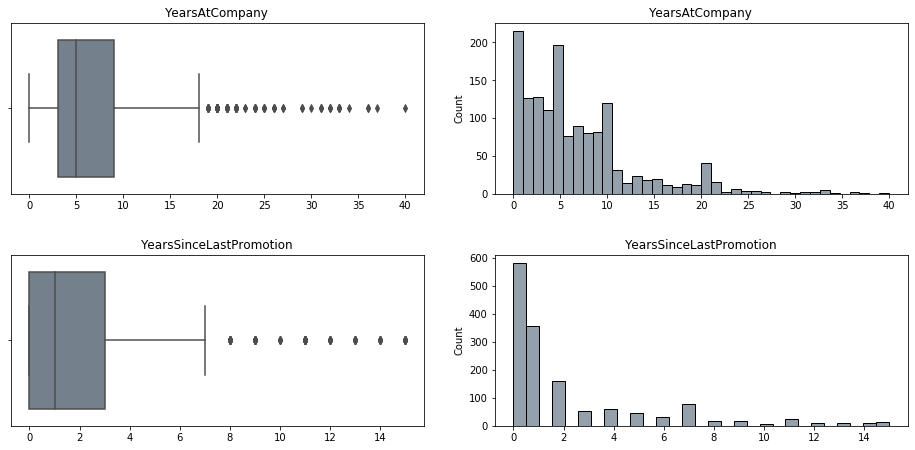

In [25]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (14,7))
fig.tight_layout(pad = 4.0)

sns.boxplot(ax = axes[0, 0], data = data, x = 'YearsAtCompany', color = 'slategrey')
axes[0, 0].set_title('YearsAtCompany', fontsize = 12)
axes[0, 0].set_xlabel('')
sns.histplot(ax = axes[0, 1], data = data, x = 'YearsAtCompany', color = 'slategrey')
axes[0, 1].set_title('YearsAtCompany', fontsize = 12)
axes[0, 1].set_xlabel('')

sns.boxplot(ax = axes[1, 0], data = data, x = 'YearsSinceLastPromotion', color = 'slategrey')
axes[1, 0].set_title('YearsSinceLastPromotion', fontsize = 12)
axes[1, 0].set_xlabel('')
sns.histplot(ax = axes[1, 1], data = data, x = 'YearsSinceLastPromotion', color = 'slategrey')
axes[1, 1].set_title('YearsSinceLastPromotion', fontsize = 12)
axes[1, 1].set_xlabel('')

In [26]:
data_Out_YearsAtCompany = data[data['YearsAtCompany'] > 28]
print('There are:', data_Out_YearsAtCompany.shape[0], 'employees with more than 28 years at the company')
print('They represent', round(data_Out_YearsAtCompany.shape[0]/data.shape[0]*100, 2), '% of our dataset')

There are: 19 employees with more than 28 years at the company
They represent 1.29 % of our dataset


In [27]:
data_Out_YearsSinceLastPromotion = data[data['YearsSinceLastPromotion'] > 12]
print('There are:', data_Out_YearsSinceLastPromotion.shape[0], 'employees with more than 8 years since their last promotion')
print('They represent', round(data_Out_YearsSinceLastPromotion.shape[0]/data.shape[0]*100, 2), '% of our dataset')

There are: 32 employees with more than 8 years since their last promotion
They represent 2.18 % of our dataset


In [28]:
data.drop(index = data[data['YearsAtCompany'] > 28].index, inplace =True)

Text(0.5, 42.00000000000006, '')

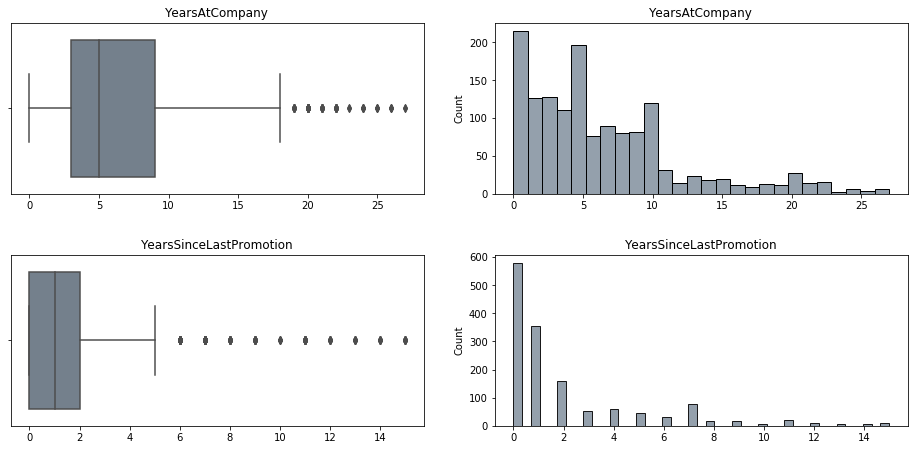

In [29]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (14,7))
fig.tight_layout(pad = 4.0)

sns.boxplot(ax = axes[0, 0], data = data, x = 'YearsAtCompany', color = 'slategrey')
axes[0, 0].set_title('YearsAtCompany', fontsize = 12)
axes[0, 0].set_xlabel('')
sns.histplot(ax = axes[0, 1], data = data, x = 'YearsAtCompany', color = 'slategrey')
axes[0, 1].set_title('YearsAtCompany', fontsize = 12)
axes[0, 1].set_xlabel('')

sns.boxplot(ax = axes[1, 0], data = data, x = 'YearsSinceLastPromotion', color = 'slategrey')
axes[1, 0].set_title('YearsSinceLastPromotion', fontsize = 12)
axes[1, 0].set_xlabel('')
sns.histplot(ax = axes[1, 1], data = data, x = 'YearsSinceLastPromotion', color = 'slategrey')
axes[1, 1].set_title('YearsSinceLastPromotion', fontsize = 12)
axes[1, 1].set_xlabel('')

In [30]:
data_Out_YearsSinceLastPromotion = data[data['YearsAtCompany'] > 20]
print('There are:', data_Out_YearsSinceLastPromotion.shape[0], 'employees with more than 8 years since their last promotion')
print('They represent', round(data_Out_YearsSinceLastPromotion.shape[0]/data.shape[0]*100, 2), '% of our dataset')

There are: 47 employees with more than 8 years since their last promotion
They represent 3.24 % of our dataset


We removed 45 employee records, that represent 3% of our dataset.

In [31]:
data.drop(index = data[data['YearsAtCompany'] > 20].index, inplace =True)

#### Data Reduction - Feature Selection

We decided to drop the features `EmployeeCount`, `Over18`, `StandardHours`, as they are unary variables.

In [32]:
data = data.drop(columns = {'EmployeeCount', 'Over18', "StandardHours"})

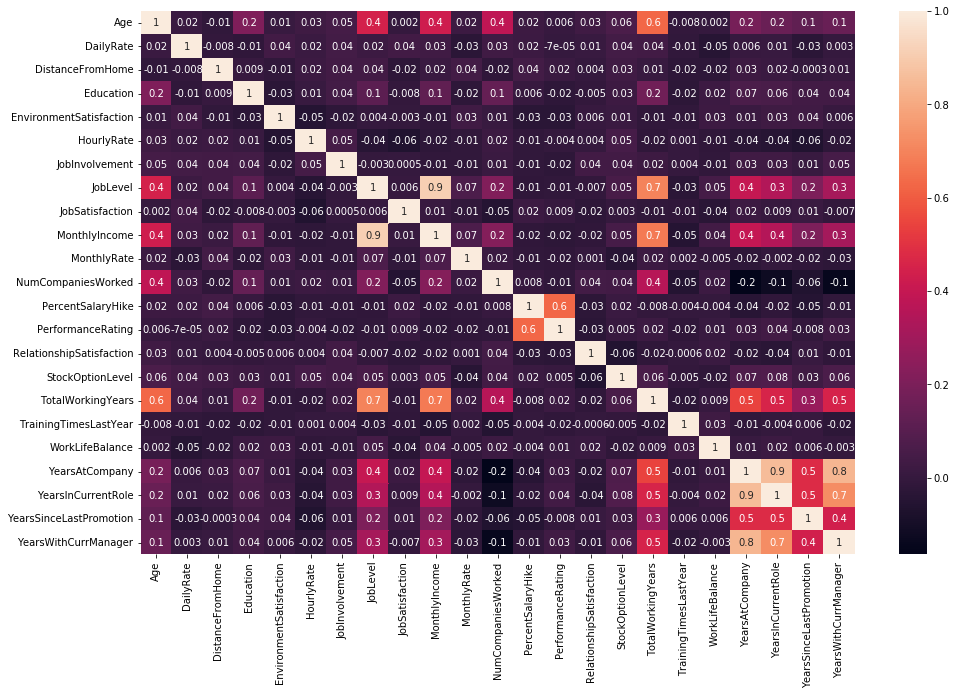

In [33]:
df_corr = data.corr(method = 'spearman')
figure = plt.figure(figsize=(16,10))
sns.heatmap(df_corr, annot=True, fmt = '.1g')

In [34]:
#Removing highly correlated variables with years at the company
del data['YearsInCurrentRole']
del data['YearsWithCurrManager']

### Predictive Model

In [35]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split

## KNN Imputer to impute the missing values ##
from sklearn.impute import KNNImputer
## MinMax for scaling
from sklearn.preprocessing import MinMaxScaler

## filter methods ###
import scipy.stats as stats
# chi-square
from scipy.stats import chi2_contingency

## wrapper methods ##
from sklearn.feature_selection import RFE
## embedded methods ##
from sklearn.linear_model import LassoCV
## evaluation metric ##
from sklearn.metrics import f1_score
## model selection ##
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

## CLASSIFICATION MODELS ##
### Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
### support vector machines classifier 
from sklearn.svm import SVC
### K Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
### Decision Tree ###
from sklearn.tree import DecisionTreeClassifier
## ensemble classifiers ##
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import ExtraTreesClassifier
## Neural Network - Multi-layer Perceptron Classifier ##
from sklearn.neural_network import MLPClassifier

#### Identifying independent variables and target variable

In [36]:
data['Attrition'] = data['Attrition'].replace('Yes', 1)
data['Attrition'] = data['Attrition'].replace('No', 0)

In [37]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsSinceLastPromotion'],
      dtype='object')

In [38]:
# column_names = [              
#                  'MonthlyIncome', 
#                 'OverTime', 
#                  'StockOptionLevel', 
                 
#                  'Attrition']

column_names = [ 'Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany']


In [39]:
data = data[column_names]

In [40]:
data.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,1102,Sales,1,2,2,Female,94,3,2,Sales Executive,4,Single,5993,8,Yes,11,3,1,0,8,0,1,6
2,49,0,Travel_Frequently,279,Research & Development,8,1,3,Male,61,2,2,Research Scientist,2,Married,5130,1,No,23,4,4,1,10,3,3,10


### Feature Engineering

In [41]:
data['OverTime'].value_counts()

No     1010
Yes     394
Name: OverTime, dtype: int64

In [42]:
data['OverTime'] = data['OverTime'].replace('Yes', 1)
data['OverTime'] = data['OverTime'].replace('No', 0)

In [43]:
data['OverTime'].value_counts()

0    1010
1     394
Name: OverTime, dtype: int64

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1404 entries, 1 to 2068
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1404 non-null   int64 
 1   Attrition                 1404 non-null   int64 
 2   BusinessTravel            1404 non-null   object
 3   DailyRate                 1404 non-null   int64 
 4   Department                1404 non-null   object
 5   DistanceFromHome          1404 non-null   int64 
 6   Education                 1404 non-null   int64 
 7   EnvironmentSatisfaction   1404 non-null   int64 
 8   Gender                    1404 non-null   object
 9   HourlyRate                1404 non-null   int64 
 10  JobInvolvement            1404 non-null   int64 
 11  JobLevel                  1404 non-null   int64 
 12  JobRole                   1404 non-null   object
 13  JobSatisfaction           1404 non-null   int64 
 14  MaritalStatus           

#### Creating Dummy Variables

In [45]:
data['BusinessTravel'].value_counts()

Travel_Rarely        997
Travel_Frequently    262
Non-Travel           145
Name: BusinessTravel, dtype: int64

In [46]:
data['Travel_Rarely'] = np.where(data.BusinessTravel == 'Travel_Rarely', 1, 0)
data['Travel_Frequently'] = np.where(data.BusinessTravel == 'Travel_Frequently', 1, 0)
data.drop(['BusinessTravel'], axis = 1, inplace = True)

In [47]:
print('Travel_Rarely =', data['Travel_Rarely'].sum())
print('Travel_Frequently =', data['Travel_Frequently'].sum())

Travel_Rarely = 997
Travel_Frequently = 262


In [48]:
data['Department'].value_counts()

Research & Development    921
Sales                     425
Human Resources            58
Name: Department, dtype: int64

In [49]:
data['Department_ResearchDevelopment'] = np.where(data.Department == 'Research & Development', 1, 0)
data['Department_Sales'] = np.where(data.Department == 'Sales', 1, 0)
data.drop(['Department'], axis = 1, inplace = True)

In [50]:
print('Research & Development =', data['Department_ResearchDevelopment'].sum())
print('Sales =', data['Department_Sales'].sum())

Research & Development = 921
Sales = 425


In [51]:
data['JobRole'].value_counts()

Sales Executive              318
Research Scientist           292
Laboratory Technician        257
Manufacturing Director       141
Healthcare Representative    125
Sales Representative          83
Research Director             68
Manager                       68
Human Resources               52
Name: JobRole, dtype: int64

In [52]:
data['JobRole_SalesExecutive'] = np.where(data.JobRole == 'Sales Executive', 1, 0)
data['JobRole_ResearchScientist'] = np.where(data.JobRole == 'Research Scientist', 1, 0)
data['JobRole_LaboratoryTechnician'] = np.where(data.JobRole == 'Laboratory Technician', 1, 0)
data['JobRole_ManufacturingDirector'] = np.where(data.JobRole == 'Manufacturing Director', 1, 0)
data['JobRole_HealthcareRepresentative'] = np.where(data.JobRole == 'Healthcare Representative', 1, 0)
data['JobRole_SalesRepresentative'] = np.where(data.JobRole == 'Sales Representative', 1, 0)
data['JobRole_Manager'] = np.where(data.JobRole == 'Manager', 1, 0)
data['JobRole_ResearchDirector'] = np.where(data.JobRole == 'Research Director', 1, 0)

data.drop(['JobRole'], axis = 1, inplace = True)

In [53]:
print('Sales Executive =', data['JobRole_SalesExecutive'].sum())
print('Research Scientist =', data['JobRole_ResearchScientist'].sum())
print('Laboratory Technician =', data['JobRole_LaboratoryTechnician'].sum())
print('Manufacturing Director =', data['JobRole_ManufacturingDirector'].sum())
print('Healthcare Representative =', data['JobRole_HealthcareRepresentative'].sum())
print('Sales Representative =', data['JobRole_SalesRepresentative'].sum())
print('Manager =', data['JobRole_Manager'].sum())
print('Research Director =', data['JobRole_ResearchDirector'].sum())

Sales Executive = 318
Research Scientist = 292
Laboratory Technician = 257
Manufacturing Director = 141
Healthcare Representative = 125
Sales Representative = 83
Manager = 68
Research Director = 68


In [54]:
data.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,Travel_Rarely,Travel_Frequently,Department_ResearchDevelopment,Department_Sales,JobRole_SalesExecutive,JobRole_ResearchScientist,JobRole_LaboratoryTechnician,JobRole_ManufacturingDirector,JobRole_HealthcareRepresentative,JobRole_SalesRepresentative,JobRole_Manager,JobRole_ResearchDirector
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,1,1102,1,2,2,Female,94,3,2,4,Single,5993,8,1,11,3,1,0,8,0,1,6,1,0,0,1,1,0,0,0,0,0,0,0
2,49,0,279,8,1,3,Male,61,2,2,2,Married,5130,1,0,23,4,4,1,10,3,3,10,0,1,1,0,0,1,0,0,0,0,0,0
4,37,1,1373,2,2,4,Male,92,2,1,3,Single,2090,6,1,15,3,2,0,7,3,3,0,1,0,1,0,0,0,1,0,0,0,0,0
5,33,0,1392,3,4,4,Female,56,3,1,3,Married,2909,1,1,11,3,3,0,8,3,3,8,0,1,1,0,0,1,0,0,0,0,0,0
7,27,0,591,2,1,1,Male,40,3,1,2,Married,3468,9,0,12,3,4,1,6,3,3,2,1,0,1,0,0,0,1,0,0,0,0,0


Education (HigherEducation), WorkLifeBalance (4,3,2), EnvironmentSatisfaction (4,3,2), JobInvolvement (4,3,2), RelationshipSatisfaction (4,3,2), JobSatisfaction (4,3,2), JobLevel (1,2,3,4), PerformanceRating (3), StockOptionLevel (0,1,2)

In [55]:
data.WorkLifeBalance.value_counts()

3    852
2    327
4    148
1     77
Name: WorkLifeBalance, dtype: int64

In [56]:
data['WorkLifeBalance_4'] = np.where(data.WorkLifeBalance == 4, 1, 0)
data['WorkLifeBalance_3'] = np.where(data.WorkLifeBalance == 3, 1, 0)
data['WorkLifeBalance_2'] = np.where(data.WorkLifeBalance == 2, 1, 0)
data.drop(['WorkLifeBalance'], axis = 1, inplace = True)

In [57]:
print('WorkLifeBalance_4 =', data['WorkLifeBalance_4'].sum())
print('WorkLifeBalance_3 =', data['WorkLifeBalance_3'].sum())
print('WorkLifeBalance_2 =', data['WorkLifeBalance_2'].sum())

WorkLifeBalance_4 = 148
WorkLifeBalance_3 = 852
WorkLifeBalance_2 = 327


In [58]:
data.JobLevel.value_counts()

1    543
2    534
3    206
4     81
5     40
Name: JobLevel, dtype: int64

In [59]:
data['JobLevel_1'] = np.where(data.JobLevel == 1, 1, 0)
data['JobLevel_2'] = np.where(data.JobLevel == 2, 1, 0)
data['JobLevel_3'] = np.where(data.JobLevel == 3, 1, 0)
data['JobLevel_4'] = np.where(data.JobLevel == 4, 1, 0)
data.drop(['JobLevel'], axis = 1, inplace = True)

In [60]:
print('JobLevel_1 =', data['JobLevel_1'].sum())
print('JobLevel_2 =', data['JobLevel_2'].sum())
print('JobLevel_3 =', data['JobLevel_3'].sum())
print('JobLevel_4 =', data['JobLevel_4'].sum())

JobLevel_1 = 543
JobLevel_2 = 534
JobLevel_3 = 206
JobLevel_4 = 81


In [61]:
data.StockOptionLevel.value_counts()

0    605
1    562
2    154
3     83
Name: StockOptionLevel, dtype: int64

In [62]:
data['StockOptionLevel_0'] = np.where(data.StockOptionLevel == 0, 1, 0)
data['StockOptionLevel_1'] = np.where(data.StockOptionLevel == 1, 1, 0)
data['StockOptionLevel_2'] = np.where(data.StockOptionLevel == 2, 1, 0)
data.drop(['StockOptionLevel'], axis = 1, inplace = True)

In [63]:
print('StockOptionLevel_0 =', data['StockOptionLevel_0'].sum())
print('StockOptionLevel_1 =', data['StockOptionLevel_1'].sum())
print('StockOptionLevel_2 =', data['StockOptionLevel_2'].sum())

StockOptionLevel_0 = 605
StockOptionLevel_1 = 562
StockOptionLevel_2 = 154


In [64]:
data['male'] = np.where(data.Gender == 'Male', 1, 0)
data.drop(['Gender'], axis = 1, inplace = True)

In [65]:
data['Married'] = np.where(data.MaritalStatus == 'Married', 1, 0)
data.drop(['MaritalStatus'], axis = 1, inplace = True)

#### Scaling the dataset

In [66]:
data.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,Travel_Rarely,Travel_Frequently,Department_ResearchDevelopment,Department_Sales,JobRole_SalesExecutive,JobRole_ResearchScientist,JobRole_LaboratoryTechnician,JobRole_ManufacturingDirector,JobRole_HealthcareRepresentative,JobRole_SalesRepresentative,JobRole_Manager,JobRole_ResearchDirector,WorkLifeBalance_4,WorkLifeBalance_3,WorkLifeBalance_2,JobLevel_1,JobLevel_2,JobLevel_3,JobLevel_4,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,male,Married
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,1,1102,1,2,2,94,3,4,5993,8,1,11,3,1,8,0,6,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2,49,0,279,8,1,3,61,2,2,5130,1,0,23,4,4,10,3,10,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,1
4,37,1,1373,2,2,4,92,2,3,2090,6,1,15,3,2,7,3,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0
5,33,0,1392,3,4,4,56,3,3,2909,1,1,11,3,3,8,3,8,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1
7,27,0,591,2,1,1,40,3,2,3468,9,0,12,3,4,6,3,2,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,1


In [67]:
scaler = MinMaxScaler().fit(data)
data_scaled = scaler.transform(data)
data_scaled = pd.DataFrame(data_scaled, columns = data.columns).set_index(data.index)
data_scaled.head(2)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,Travel_Rarely,Travel_Frequently,Department_ResearchDevelopment,Department_Sales,JobRole_SalesExecutive,JobRole_ResearchScientist,JobRole_LaboratoryTechnician,JobRole_ManufacturingDirector,JobRole_HealthcareRepresentative,JobRole_SalesRepresentative,JobRole_Manager,JobRole_ResearchDirector,WorkLifeBalance_4,WorkLifeBalance_3,WorkLifeBalance_2,JobLevel_1,JobLevel_2,JobLevel_3,JobLevel_4,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,male,Married
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.547619,1.0,0.71582,0.00,0.25,0.333333,0.914286,0.666667,1.000000,0.263230,0.888889,1.0,0.000000,0.0,0.0,0.216216,0.0,0.3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.738095,0.0,0.12670,0.25,0.00,0.666667,0.442857,0.333333,0.333333,0.217651,0.111111,0.0,0.857143,1.0,1.0,0.270270,0.5,0.5,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0


In [68]:
data_scaled.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,Travel_Rarely,Travel_Frequently,Department_ResearchDevelopment,Department_Sales,JobRole_SalesExecutive,JobRole_ResearchScientist,JobRole_LaboratoryTechnician,JobRole_ManufacturingDirector,JobRole_HealthcareRepresentative,JobRole_SalesRepresentative,JobRole_Manager,JobRole_ResearchDirector,WorkLifeBalance_4,WorkLifeBalance_3,WorkLifeBalance_2,JobLevel_1,JobLevel_2,JobLevel_3,JobLevel_4,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,male,Married
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.547619,1.0,0.715820,0.000000,0.25,0.333333,0.914286,0.666667,1.000000,0.263230,0.888889,1.0,0.000000,0.0,0.000000,0.216216,0.0,0.3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.738095,0.0,0.126700,0.250000,0.00,0.666667,0.442857,0.333333,0.333333,0.217651,0.111111,0.0,0.857143,1.0,1.000000,0.270270,0.5,0.5,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
4,0.452381,1.0,0.909807,0.035714,0.25,1.000000,0.885714,0.333333,0.666667,0.057093,0.666667,1.0,0.285714,0.0,0.333333,0.189189,0.5,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5,0.357143,0.0,0.923407,0.071429,0.75,1.000000,0.371429,0.666667,0.666667,0.100349,0.111111,1.0,0.000000,0.0,0.666667,0.216216,0.5,0.4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7,0.214286,0.0,0.350036,0.035714,0.00,0.000000,0.142857,0.666667,0.333333,0.129872,1.000000,0.0,0.071429,0.0,1.000000,0.162162,0.5,0.1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0


## Data split

In [69]:
X = data_scaled.drop('Attrition', axis = 1)
y = data_scaled['Attrition']

In [70]:
X_train, X_val, y_train, y_val = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=13, 
                                                    shuffle=True, 
                                                    stratify=y
                                                   )


print('train:{}% | validation:{}% | test:{}%'.format(round(len(y_train)/len(y),2),
                                                     round(len(y_val)/len(y),2),
                                                     round(len(y_val)/len(y),2)
                                                    ))


train:0.8% | validation:0.2% | test:0.2%


# Feature Selection

In [71]:
X.head(2)

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,Travel_Rarely,Travel_Frequently,Department_ResearchDevelopment,Department_Sales,JobRole_SalesExecutive,JobRole_ResearchScientist,JobRole_LaboratoryTechnician,JobRole_ManufacturingDirector,JobRole_HealthcareRepresentative,JobRole_SalesRepresentative,JobRole_Manager,JobRole_ResearchDirector,WorkLifeBalance_4,WorkLifeBalance_3,WorkLifeBalance_2,JobLevel_1,JobLevel_2,JobLevel_3,JobLevel_4,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,male,Married
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.547619,0.71582,0.00,0.25,0.333333,0.914286,0.666667,1.000000,0.263230,0.888889,1.0,0.000000,0.0,0.0,0.216216,0.0,0.3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.738095,0.12670,0.25,0.00,0.666667,0.442857,0.333333,0.333333,0.217651,0.111111,0.0,0.857143,1.0,1.0,0.270270,0.5,0.5,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0


In [72]:
X.shape[1]

41

## RFE

In [73]:
model = DecisionTreeClassifier()
# model = RandomForestClassifier()

In [74]:
from sklearn.feature_selection import RFE
#no of features
nof_list=np.arange(1,42)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    model = DecisionTreeClassifier()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_val_rfe = rfe.transform(X_val)
    model.fit(X_train_rfe,y_train)

    score = model.score(X_val_rfe,y_val)
    score_list.append(score)

    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 18
Score with 18 features: 0.800712


In [75]:
rfe = RFE(estimator = model, n_features_to_select = nof)
X_rfe = rfe.fit_transform(X = X_train, y = y_train)
X_train.columns
selected_features = pd.Series(rfe.support_, index = X_train.columns)
selected_features

Age                                  True
DailyRate                            True
DistanceFromHome                     True
Education                            True
EnvironmentSatisfaction              True
HourlyRate                           True
JobInvolvement                       True
JobSatisfaction                      True
MonthlyIncome                        True
NumCompaniesWorked                   True
OverTime                             True
PercentSalaryHike                    True
PerformanceRating                   False
RelationshipSatisfaction             True
TotalWorkingYears                    True
TrainingTimesLastYear                True
YearsAtCompany                       True
Travel_Rarely                       False
Travel_Frequently                    True
Department_ResearchDevelopment      False
Department_Sales                    False
JobRole_SalesExecutive              False
JobRole_ResearchScientist           False
JobRole_LaboratoryTechnician      

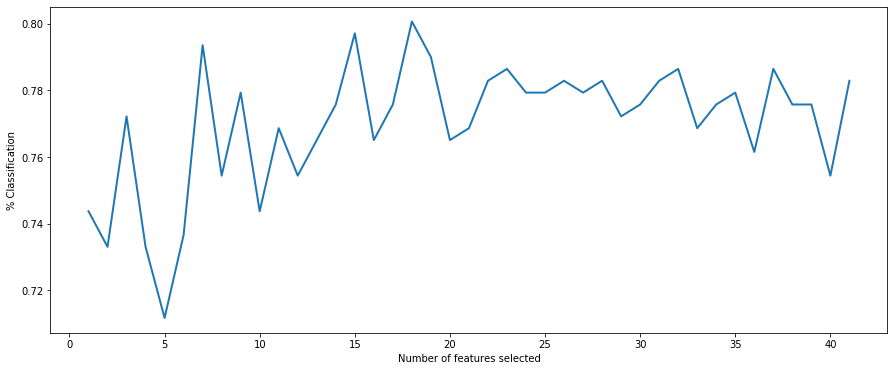

In [76]:
plt.figure(figsize=(15, 6))
plt.plot(nof_list, score_list, linewidth=2)
plt.xlabel('Number of features selected')
plt.ylabel('% Classification')
plt.show()

In [77]:
from sklearn.linear_model import LassoCV

In [78]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

In [79]:
reg = LassoCV()
reg.fit(X_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [80]:
coef = pd.Series(reg.coef_, index = X_train.columns)
coef

Age                                -0.057628
DailyRate                          -0.066861
DistanceFromHome                    0.100692
Education                           0.000000
EnvironmentSatisfaction            -0.120245
HourlyRate                          0.000000
JobInvolvement                     -0.133463
JobSatisfaction                    -0.109576
MonthlyIncome                      -0.011532
NumCompaniesWorked                  0.149218
OverTime                            0.214153
PercentSalaryHike                  -0.000000
PerformanceRating                   0.000000
RelationshipSatisfaction           -0.074679
TotalWorkingYears                  -0.150054
TrainingTimesLastYear              -0.060771
YearsAtCompany                     -0.018253
Travel_Rarely                       0.031899
Travel_Frequently                   0.128572
Department_ResearchDevelopment     -0.012349
Department_Sales                    0.062983
JobRole_SalesExecutive              0.009296
JobRole_Re

In [81]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 32 variables and eliminated the other 9 variables


In [82]:
coef.sort_values()

TotalWorkingYears                  -0.150054
JobInvolvement                     -0.133463
EnvironmentSatisfaction            -0.120245
JobSatisfaction                    -0.109576
JobLevel_2                         -0.082967
RelationshipSatisfaction           -0.074679
WorkLifeBalance_3                  -0.072646
DailyRate                          -0.066861
TrainingTimesLastYear              -0.060771
WorkLifeBalance_2                  -0.058447
Age                                -0.057628
JobRole_ResearchDirector           -0.050856
JobRole_ResearchScientist          -0.047788
StockOptionLevel_1                 -0.031303
JobLevel_4                         -0.023021
YearsAtCompany                     -0.018253
Department_ResearchDevelopment     -0.012349
MonthlyIncome                      -0.011532
Married                            -0.008333
StockOptionLevel_2                 -0.007183
WorkLifeBalance_4                  -0.000000
PerformanceRating                   0.000000
JobRole_Ma

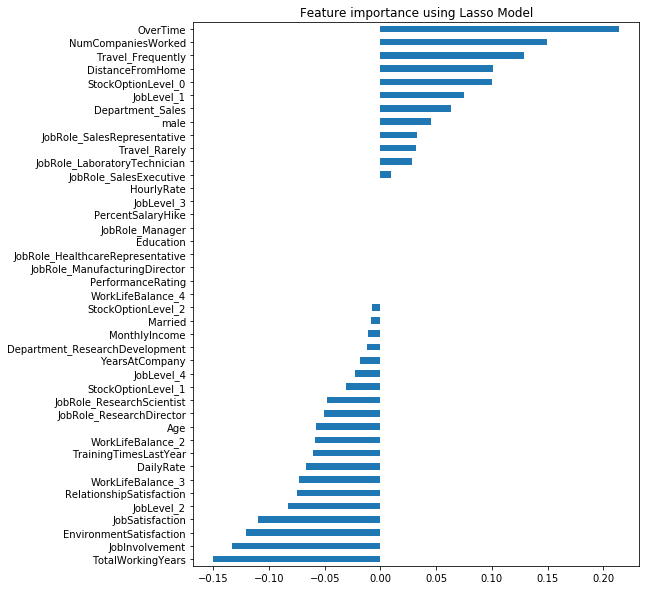

In [83]:
plot_importance(coef,'Lasso')

## Decision tree for feature selection

In [84]:
gini_importance = DecisionTreeClassifier().fit(X_train, y_train).feature_importances_
entropy_importance = DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train).feature_importances_

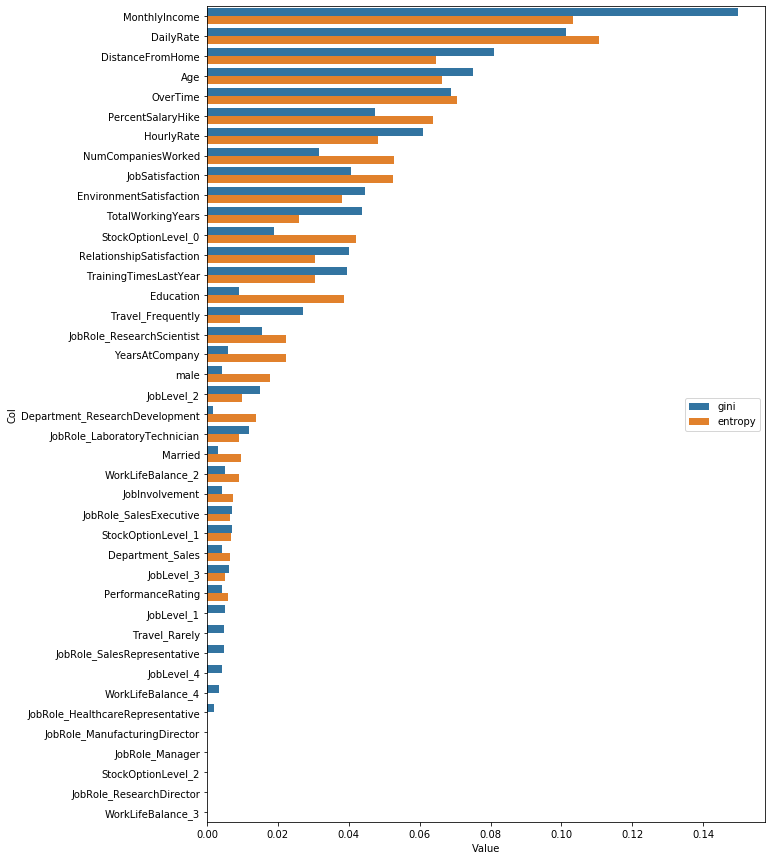

In [85]:
zippy = pd.DataFrame(zip(gini_importance, entropy_importance), columns = ['gini','entropy'])
zippy['col'] = X_train.columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)

plt.figure(figsize=(10,15))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy)

plt.legend(loc='center right')

In [86]:
data_scaled.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',
       'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'Travel_Rarely', 'Travel_Frequently', 'Department_ResearchDevelopment',
       'Department_Sales', 'JobRole_SalesExecutive',
       'JobRole_ResearchScientist', 'JobRole_LaboratoryTechnician',
       'JobRole_ManufacturingDirector', 'JobRole_HealthcareRepresentative',
       'JobRole_SalesRepresentative', 'JobRole_Manager',
       'JobRole_ResearchDirector', 'WorkLifeBalance_4', 'WorkLifeBalance_3',
       'WorkLifeBalance_2', 'JobLevel_1', 'JobLevel_2', 'JobLevel_3',
       'JobLevel_4', 'StockOptionLevel_0', 'StockOptionLevel_1',
       'StockOptionLevel_2', 'male', 'Married'],
      dtype='object')

In [87]:
del data_scaled['Travel_Rarely']
del data_scaled['JobRole_SalesExecutive']
del data_scaled['JobRole_ManufacturingDirector']

del data_scaled['JobRole_HealthcareRepresentative']
del data_scaled['JobRole_Manager']

del data_scaled['JobRole_ResearchDirector']
del data_scaled['WorkLifeBalance_3']

del data_scaled['JobLevel_1']
del data_scaled['JobLevel_4']

del data_scaled['StockOptionLevel_2']
del data_scaled['Married']

# Re-split data with updated columns

In [88]:
X = data_scaled.drop('Attrition', axis = 1)
y = data_scaled['Attrition']

In [89]:
X_train, X_val, y_train, y_val = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=13, 
                                                    shuffle=True, 
                                                    stratify=y
                                                   )


print('train:{}% | validation:{}% | test:{}%'.format(round(len(y_train)/len(y),2),
                                                     round(len(y_val)/len(y),2),
                                                     round(len(y_val)/len(y),2)
                                                    ))


train:0.8% | validation:0.2% | test:0.2%


# Permutation Importance

In [90]:
my_model = RandomForestClassifier(n_estimators=100,
                                  random_state=0).fit(X_train, y_train)

In [93]:
pip install eli5

Note: you may need to restart the kernel to use updated packages.


In [94]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(my_model, random_state=1).fit(X_val, y_val)
eli5.show_weights(perm, feature_names = X_val.columns.tolist(),top=35)

Weight,Feature
0.0178 ± 0.0127,YearsAtCompany
0.0149 ± 0.0227,OverTime
0.0128 ± 0.0057,TotalWorkingYears
0.0085 ± 0.0057,Age
0.0085 ± 0.0073,StockOptionLevel_0
0.0064 ± 0.0070,MonthlyIncome
0.0064 ± 0.0053,Travel_Frequently
0.0014 ± 0.0073,JobRole_LaboratoryTechnician
0.0007 ± 0.0028,JobLevel_2
0.0007 ± 0.0070,EnvironmentSatisfaction


# Optional

In [95]:
#  data_scaled = data_scaled[["YearsAtCompany", "OverTime","TotalWorkingYears","Age","StockOptionLevel_0","MonthlyIncome","Travel_Frequently"]]

# Compare ML Models

In [96]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score

In [97]:
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [98]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

def compare_models(data, model):
    # apply StratifiedK-Fold
    skf = StratifiedKFold(n_splits = 10)
    score_train = []
    score_test = []
    score_train = []
    score_val = []
   
    for train_index, val_index in skf.split(X,y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
                       
    
        model.fit(X_train, y_train)
        predictions_train = model.predict(X_train)
        predictions_val = model.predict(X_val)
        score_train.append(accuracy_score(y_train, predictions_train))
        score_val.append(accuracy_score(y_val, predictions_val))

        avg_train = round(np.mean(score_train),3)
        avg_val = round(np.mean(score_val),3)
        std_train = round(np.std(score_train),2)
        std_val = round(np.std(score_val),2)

    return str(avg_train) + '+/-' + str(std_train),str(avg_val) + '+/-' + str(std_val)
    
def show_results(df_aux, data, *args):
    """
    Receive an empty dataframe and the different models and call the function avg_score
    """
    count = 0
    # for each model passed as argument
    for arg in args:
        # obtain the results provided by avg_score
        avg_train, avg_test = compare_models(data, arg)
        # store the results in the right row
        df_aux.iloc[count] = avg_train, avg_test
        count+=1
    return df_aux

In [106]:
model_LR = LogisticRegression()
model_KNN = KNeighborsClassifier()
model_DT = DecisionTreeClassifier()
df_aux = pd.DataFrame(columns = ['Train','Validation'], index = ['Logistic Regression','KNN','DecisionTree'])
show_results(df_aux, data_scaled, model_LR, model_KNN,model_DT)

,Train,Validation
Logistic Regression,0.896+/-0.0,0.887+/-0.02
KNN,0.883+/-0.0,0.852+/-0.02
DecisionTree,1.0+/-0.0,0.796+/-0.02


In [99]:
model_LR = LogisticRegression(random_state = 1)
model_KNN = KNeighborsClassifier()
model_GradientBoosting = GradientBoostingClassifier(random_state = 1)
model_RandomForest = RandomForestClassifier(random_state = 1)
model_AdaBoost = AdaBoostClassifier(random_state = 1)
model_Bagging = BaggingClassifier(random_state = 1)
model_DecisionTree = DecisionTreeClassifier(random_state = 1)
model_NN_MLP = MLPClassifier(random_state = 1)
model_ExtraTrees = ExtraTreesClassifier(random_state = 1)

df_aux = pd.DataFrame(columns = ['Train','Validation'], 
                      index = ['Logistic Regression','KNN','GradientBoosting', 'RandomForest',  'AdaBoost', 'Bagging',
                              'DecisionTree', 'NN_MLP', 'ExtraTrees'])
show_results(df_aux, data_scaled, model_LR, model_KNN, model_GradientBoosting, model_RandomForest, model_AdaBoost, 
                                model_Bagging, model_DecisionTree, model_NN_MLP, model_ExtraTrees)

,Train,Validation
Logistic Regression,0.896+/-0.0,0.887+/-0.02
KNN,0.883+/-0.0,0.852+/-0.02
GradientBoosting,0.947+/-0.0,0.865+/-0.02
RandomForest,1.0+/-0.0,0.855+/-0.01
AdaBoost,0.901+/-0.0,0.875+/-0.02
Bagging,0.983+/-0.0,0.854+/-0.02
DecisionTree,1.0+/-0.0,0.779+/-0.02
NN_MLP,0.936+/-0.01,0.868+/-0.02
ExtraTrees,1.0+/-0.0,0.862+/-0.01


# Decision tree

In [107]:
from sklearn.metrics import f1_score, make_scorer

In [108]:
param_grid = {  'max_depth': [2,5,10,20,None], 'criterion' : ['entropy'],
              'max_features' : [None,1,2,5],
              'min_impurity_decrease': [0,0.02,0.04,0.1,0.01],                                                                               
               'min_samples_split': [2,5, 10, 20,3],
              'max_leaf_nodes' : [None,2,4,10,20],
                           }


In [109]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)

g_search = GridSearchCV(estimator = model_DT, param_grid = param_grid, 
                          cv = cv, n_jobs = -1 , scoring='f1')
g_search.fit(X_train, y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              p...
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_g

In [110]:
print(g_search.best_params_)

{'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0, 'min_samples_split': 3}


In [111]:
final_model_dt = g_search.best_estimator_.fit(X_train, y_train)
print('Train:', final_model_dt.score(X_train, y_train))
print('Test:', final_model_dt.score(X_val, y_val))

Train: 0.9982190560997328
Test: 0.7686832740213523


In [112]:
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

In [113]:
score_train=[]
score_val=[]
predictions_train = final_model_dt.predict(X_train)
predictions_val = final_model_dt.predict(X_val)
score_train.append(accuracy_score(y_train, predictions_train))
score_val.append(accuracy_score(y_val, predictions_val))
print('accuracy' , score_train,score_val)

score_train=[]
score_val=[]
score_train.append(f1_score(y_train, predictions_train))
score_val.append(f1_score(y_val, predictions_val))

print('f1score' , score_train,score_val)



accuracy [0.9982190560997328] [0.7686832740213523]
f1score [0.9945054945054945] [0.25287356321839083]


# MLP classifier

In [114]:
model_MLP = MLPClassifier()

In [115]:
parameter_space = {
    'hidden_layer_sizes': [(3,),(2,2),(2,0),(5,5),(3,3,3)],
    'activation': ['tanh', 'relu','logistic'],
    'solver': ['adam','sgd','lbfgs'],
    'learning_rate_init': [0.01, 0.05,0.001],
    'learning_rate': ['constant','adaptive','invscaling'],
    'alpha': [0.01,0.001,0.1]
   
}

In [116]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
clf = GridSearchCV(estimator= model_MLP, param_grid= parameter_space,n_jobs=-1,scoring="f1",cv=cv )

In [117]:
clf.fit(X_train, y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter...
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu', 'logistic'],
                         'alpha': [0.01, 0.001, 0.1],
                         'hidden_layer_sizes': [(3,), (2, 2), (2, 0), (5, 5),
                                                (3, 3, 3)],
                         'learning_rate':

In [118]:
clf.best_params_

{'activation': 'tanh',
 'alpha': 0.1,
 'hidden_layer_sizes': (3,),
 'learning_rate': 'adaptive',
 'learning_rate_init': 0.05,
 'solver': 'sgd'}

In [119]:
final_model_mlp = clf.best_estimator_.fit(X_train, y_train)

In [120]:
score_train=[]
score_val=[]
predictions_train = final_model_mlp.predict(X_train)
predictions_val = final_model_mlp.predict(X_val)
score_train.append(accuracy_score(y_train, predictions_train))
score_val.append(accuracy_score(y_val, predictions_val))
print('accuracy' , score_train,score_val)

score_train=[]
score_val=[]
score_train.append(f1_score(y_train, predictions_train))
score_val.append(f1_score(y_val, predictions_val))

print('f1score' , score_train,score_val)


accuracy [0.8984861976847729] [0.8825622775800712]
f1score [0.62] [0.6024096385542168]


# Logistic regression

In [121]:
model_LR = LogisticRegression()

In [122]:
final_model_lr = model_LR.fit(X_train, y_train)

In [123]:
score_train=[]
score_val=[]
predictions_train = model_LR.predict(X_train)
predictions_val = model_LR.predict(X_val)
score_train.append(accuracy_score(y_train, predictions_train))
score_val.append(accuracy_score(y_val, predictions_val))
print('accuracy' , score_train,score_val)

score_train=[]
score_val=[]
score_train.append(f1_score(y_train, predictions_train))
score_val.append(f1_score(y_val, predictions_val))

print('f1score' , score_train,score_val)

accuracy [0.8993766696349065] [0.8612099644128114]
f1score [0.5978647686832741] [0.48]


# KNN

In [124]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(20,40,3))
n_neighbors = list(range(1,30,3))
p=[1,2]

#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

#Create new KNN object
knn_2 = KNeighborsClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=cv,scoring='f1')
#Fit the model
best_model = clf.fit(X_train,y_train)

#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

model_knn = best_model.best_estimator_.fit(X_train, y_train)


Best leaf_size: 20
Best p: 2
Best n_neighbors: 1


In [125]:
score_train=[]
score_val=[]
predictions_train = model_knn.predict(X_train)
predictions_val = model_knn.predict(X_val)
score_train.append(accuracy_score(y_train, predictions_train))
score_val.append(accuracy_score(y_val, predictions_val))
print('accuracy' , score_train,score_val)

score_train=[]
score_val=[]
score_train.append(f1_score(y_train, predictions_train))
score_val.append(f1_score(y_val, predictions_val))

print('f1score' , score_train,score_val)

accuracy [1.0] [0.8505338078291815]
f1score [1.0] [0.475]


# Random forest

In [126]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]

min_impurity_decrease = [0,0.02,0.04,0.1]
ccp_alpha = [0]
bootstrap= ['True','false']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 50, num = 5)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 3]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]


# Create the random grid
random_grid = {'n_estimators': n_estimators,
                             
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap' : bootstrap,
               'min_impurity_decrease' : min_impurity_decrease,
               'ccp_alpha' : ccp_alpha
               }
print(random_grid)

{'n_estimators': [2, 7, 12, 18, 23, 28, 34, 39, 44, 50], 'min_samples_split': [2, 5, 3], 'min_samples_leaf': [1, 2, 4], 'bootstrap': ['True', 'false'], 'min_impurity_decrease': [0, 0.02, 0.04, 0.1], 'ccp_alpha': [0]}


In [127]:
rf = RandomForestClassifier()
cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3, random_state=1)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, cv = cv, random_state=42, n_jobs = -1,scoring='f1')
# Fit the random search model
rf_random.fit(X_train, y_train)

RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
                   error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_sample...
                     

In [128]:
rf_random.best_params_

{'n_estimators': 23,
 'min_samples_split': 3,
 'min_samples_leaf': 2,
 'min_impurity_decrease': 0,
 'ccp_alpha': 0,
 'bootstrap': 'True'}

In [129]:
final_model_rf = rf_random.best_estimator_.fit(X_train, y_train)


In [130]:
score_train=[]
score_val=[]
predictions_train = final_model_rf.predict(X_train)
predictions_val = final_model_rf.predict(X_val)
score_train.append(accuracy_score(y_train, predictions_train))
score_val.append(accuracy_score(y_val, predictions_val))
print('accuracy' , score_train,score_val)

score_train=[]
score_val=[]
score_train.append(f1_score(y_train, predictions_train))
score_val.append(f1_score(y_val, predictions_val))

print('f1score' , score_train,score_val)

accuracy [0.9608192341941229] [0.8754448398576512]
f1score [0.8633540372670807] [0.4067796610169491]


In [131]:
from sklearn.ensemble import StackingClassifier

In [132]:
estimators = [('randomforest',final_model_rf ),
              ('knn' , model_knn),
              
              ('mlp', final_model_mlp),
                                                      
             ]
sc = StackingClassifier(estimators=estimators, final_estimator=MLPClassifier())

In [133]:
final_model=sc.fit(X_train, y_train)

In [134]:
score_train=[]
score_val=[]
predictions_train = final_model.predict(X_train)
predictions_val = final_model.predict(X_val)
score_train.append(accuracy_score(y_train, predictions_train))
score_val.append(accuracy_score(y_val, predictions_val))
print('accuracy' , score_train,score_val)

score_train=[]
score_val=[]
score_train.append(f1_score(y_train, predictions_train))
score_val.append(f1_score(y_val, predictions_val))

print('f1score' , score_train,score_val)

accuracy [0.9198575244879786] [0.8790035587188612]
f1score [0.7096774193548386] [0.5853658536585366]


In [135]:
#pip install xgboost

In [136]:
from xgboost import XGBClassifier

In [137]:
model = XGBClassifier()
model.fit(X_train, y_train)

[23:21:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=True, validate_parameters=1, verbosity=None)

In [138]:
score_train=[]
score_val=[]
predictions_train = model.predict(X_train)
predictions_val = model.predict(X_val)
score_train.append(accuracy_score(y_train, predictions_train))
score_val.append(accuracy_score(y_val, predictions_val))
print('accuracy' , score_train,score_val)

score_train=[]
score_val=[]
score_train.append(f1_score(y_train, predictions_train))
score_val.append(f1_score(y_val, predictions_val))

print('f1score' , score_train,score_val)

accuracy [1.0] [0.8718861209964412]
f1score [1.0] [0.4705882352941176]


In [139]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [140]:
xgb = XGBClassifier(learning_rate=0.02, n_estimators=100,
                    silent=True, nthread=1)

In [141]:
param_comb = 5

skf = StratifiedKFold(n_splits=10, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, n_jobs=-1,scoring='f1', verbose=3 )

# Here we go

random_search.fit(X_train, y_train)



Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  25 | elapsed:    1.0s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  20 out of  25 | elapsed:    1.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    1.4s finished


[23:21:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:21:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=0.02,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           m...
                                           subsample=None, tree_method=None,
                                           use_label_encoder=True, ...),
                   iid='deprec

In [142]:
final_model_xg = random_search.best_estimator_.fit(X_train, y_train)

[23:21:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:21:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [143]:
score_train=[]
score_val=[]
predictions_train = final_model_xg.predict(X_train)
predictions_val = final_model_xg.predict(X_val)
score_train.append(accuracy_score(y_train, predictions_train))
score_val.append(accuracy_score(y_val, predictions_val))
print('accuracy' , score_train,score_val)

score_train=[]
score_val=[]
score_train.append(f1_score(y_train, predictions_train))
score_val.append(f1_score(y_val, predictions_val))

print('f1score' , score_train,score_val)

accuracy [0.8922528940338379] [0.8718861209964412]
f1score [0.5254901960784314] [0.3793103448275862]


In [144]:
estimators = [('randomforest',final_model_rf),
              ('knn' , model_knn),
              ('xg' , model),              
              ('mlp', final_model_mlp)                                                      
             ]


sc = StackingClassifier(estimators=estimators, final_estimator=MLPClassifier(random_state=1))

In [145]:
final_model=sc.fit(X_train, y_train)

[23:21:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:21:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:21:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:21:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [146]:
score_train=[]
score_val=[]
predictions_train = final_model.predict(X_train)
predictions_val = final_model.predict(X_val)
score_train.append(accuracy_score(y_train, predictions_train))
score_val.append(accuracy_score(y_val, predictions_val))
print('accuracy' , score_train,score_val)

score_train=[]
score_val=[]

score_train.append(f1_score(y_train, predictions_train))
score_val.append(f1_score(y_val, predictions_val))

print('f1score' , score_train,score_val)

accuracy [0.9082813891362422] [0.8718861209964412]
f1score [0.6508474576271187] [0.5384615384615383]
